In [ ]:
# Установка необходимых библиотек
!pip install kaggle ultralytics

# Импорт библиотек
from PIL import Image
import random
import yaml
import json
import os
from bs4 import BeautifulSoup
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Настройка Kaggle API
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username": "petrovpav", "key": "___"}  # Замените ___ на ваш ключ Kaggle

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

# Скачивание и распаковка датасета
!kaggle datasets download -d andrewmvd/hard-hat-detection
!unzip -q '/content/hard-hat-detection.zip'

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/hard-hat-detection
License(s): CC0-1.0
100% 1.22G/1.22G [00:57<00:00, 23.3MB/s]
100% 1.22G/1.22G [00:57<00:00, 22.7MB/s]


In [ ]:

!unzip -q '/content/hard-hat-detection.zip'

replace annotations/hard_hat_workers0.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Создание директории для label-файлов
!rm -r '/content/labels'
!mkdir '/content/labels'

# Словарь классов
classes = {'helmet': 0, 'head': 1, 'person': 2}

# Конвертация аннотаций
for name in os.listdir('/content/annotations'):
    with open('/content/annotations/' + name, 'r') as file:
        xml_file = file.read()
        soup = BeautifulSoup(xml_file, 'lxml')
        size = soup.find("size")
        width = int(size.find('width').text)
        height = int(size.find('height').text)
        for tag in soup.find_all("object"):
            cls = tag.find("name").text
            xmin = int(tag.find("xmin").text)
            ymin = int(tag.find("ymin").text)
            xmax = int(tag.find("xmax").text)
            ymax = int(tag.find("ymax").text)

            w = xmax - xmin
            h = ymax - ymin
            x = xmin + (w / 2)
            y = ymin + (h / 2)

            # Нормализация координат
            x = x / width
            w = w / width
            y = y / height
            h = h / height

            # Запись в файл
            with open('/content/labels/' + name[:-3] + 'txt', 'a') as f:
                f.write('{} {} {} {} {}\n'.format(classes[cls], x, y, w, h))

rm: cannot remove '/content/labels': No such file or directory


In [ ]:
# Разделение данных на train, val, test
!rm -r '/content/images/train/'
!rm -r '/content/images/valid/'
!rm -r '/content/images/test/'
!rm -r '/content/labels/train/'
!rm -r'/content/labels/valid/'

image_list = os.listdir('/content/images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=42)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=42)

print('Обучающая выборка: ', len(train_list))
print('Проверочная выборка: ', len(val_list))
print('Тестовая выборка: ', len(test_list))

# Создание директорий
!mkdir -p '/content/images/train/' '/content/images/valid/' '/content/images/test/'
!mkdir -p '/content/labels/train/' '/content/labels/valid/'

rm: cannot remove '/content/images/train/': No such file or directory
rm: cannot remove '/content/images/valid/': No such file or directory
rm: cannot remove '/content/images/test/': No such file or directory
rm: cannot remove '/content/labels/train/': No such file or directory
rm: invalid option -- '/'
Try 'rm --help' for more information.
Обучающая выборка:  4000
Проверочная выборка:  500
Тестовая выборка:  500


In [ ]:
# Функция для перемещения файлов
def move_data(name_list, folder, mode, img=True):
    format = 'png' if img else 'txt'
    for name in name_list:
        name = name[:-3] + format if img else name[:-3] + format
        print(name)
        shutil.move(folder + name, folder + f'{mode}/' + name)

# Перемещение файлов
move_data(train_list, '/content/images/', 'train', img=True)
move_data(val_list, '/content/images/', 'valid', img=True)
move_data(test_list, '/content/images/', 'test', img=True)
move_data(train_list, '/content/labels/', 'train', img=False)
move_data(val_list, '/content/labels/', 'valid', img=False)

Выходные данные были обрезаны до нескольких последних строк (5000).
hard_hat_workers1836.png
hard_hat_workers2520.png
hard_hat_workers3981.png
hard_hat_workers89.png
hard_hat_workers1280.png
hard_hat_workers3477.png
hard_hat_workers294.png
hard_hat_workers3735.png
hard_hat_workers1009.png
hard_hat_workers3574.png
hard_hat_workers3830.png
hard_hat_workers2132.png
hard_hat_workers928.png
hard_hat_workers859.png
hard_hat_workers215.png
hard_hat_workers1432.png
hard_hat_workers4680.png
hard_hat_workers4254.png
hard_hat_workers2007.png
hard_hat_workers3259.png
hard_hat_workers566.png
hard_hat_workers1500.png
hard_hat_workers3649.png
hard_hat_workers1266.png
hard_hat_workers2397.png
hard_hat_workers3167.png
hard_hat_workers2658.png
hard_hat_workers3098.png
hard_hat_workers2723.png
hard_hat_workers2979.png
hard_hat_workers3155.png
hard_hat_workers1217.png
hard_hat_workers2831.png
hard_hat_workers3537.png
hard_hat_workers1092.png
hard_hat_workers605.png
hard_hat_workers4631.png
hard_hat_worker

In [ ]:
# Создание YAML-файла для YOLO11
yaml_file = {
    'train': '/content/images/train',
    'val': '/content/images/valid',
    'test': '/content/images/test',
    'nc': 3,
    'names': ['helmet', 'head', 'person']
}

with open('/content/helmet.yaml', 'w') as file:
    yaml.dump(yaml_file, file)

# Загрузка модели YOLO11 (средний вариант - yolo11m)
from ultralytics import YOLO

# Автоматическая загрузка предобученной модели YOLO11m
model = YOLO('yolo11m.pt')  # Ultralytics автоматически скачает модель, если она отсутствует

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 64.4MB/s]


In [ ]:

model = YOLO('yolo11s.pt')  # Ultralytics автоматически скачает модель, если она отсутствует

100%|██████████| 18.4M/18.4M [00:00<00:00, 385MB/s]


In [ ]:
# Обучение модели YOLO11
model.train(
    data='/content/helmet.yaml',
    epochs=25,
    imgsz=416,
    batch=32,
    project='/content/runs/train',
    name='exp'
)

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/helmet.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/runs/train, name=exp2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /content/labels/train.cache... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/labels/valid.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]


Plotting labels to /content/runs/train/exp2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/runs/train/exp2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.79G      1.615      1.507       1.27        194        416: 100%|██████████| 125/125 [01:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


                   all        500       2659      0.893      0.438      0.513      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.02G      1.524      1.116      1.204        227        416: 100%|██████████| 125/125 [00:59<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]


                   all        500       2659      0.892      0.457      0.563      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.03G      1.495      1.055      1.175        225        416: 100%|██████████| 125/125 [01:00<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]


                   all        500       2659      0.797      0.421      0.444      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.03G      1.489      1.037       1.18        221        416: 100%|██████████| 125/125 [00:55<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all        500       2659      0.903      0.485      0.553      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.06G      1.461      1.003      1.166        182        416: 100%|██████████| 125/125 [00:56<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]

                   all        500       2659      0.927      0.512      0.581      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         4G      1.425     0.9683      1.145        193        416: 100%|██████████| 125/125 [00:58<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        500       2659      0.918      0.505      0.569      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.01G      1.411     0.9188      1.136        223        416: 100%|██████████| 125/125 [00:57<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        500       2659      0.928      0.514      0.585      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.04G      1.399     0.9219      1.129        264        416: 100%|██████████| 125/125 [00:57<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        500       2659      0.923      0.549      0.596       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.98G      1.391     0.8875      1.119        228        416: 100%|██████████| 125/125 [01:00<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]

                   all        500       2659      0.944      0.535        0.6      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.04G      1.371     0.8758      1.111        276        416: 100%|██████████| 125/125 [00:57<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        500       2659      0.944      0.534      0.605      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.03G      1.339     0.8421      1.108        235        416: 100%|██████████| 125/125 [00:56<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        500       2659      0.944      0.552      0.613      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.04G      1.336     0.8351      1.097        269        416: 100%|██████████| 125/125 [00:57<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        500       2659      0.928      0.562      0.617      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.01G      1.323     0.8178      1.091        227        416: 100%|██████████| 125/125 [00:58<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        500       2659      0.936       0.57      0.617      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.03G      1.307     0.7965       1.09        237        416: 100%|██████████| 125/125 [00:55<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all        500       2659      0.937      0.565      0.616      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.01G      1.302     0.7957      1.085        279        416: 100%|██████████| 125/125 [00:56<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        500       2659      0.927      0.572      0.616      0.378


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         4G      1.285     0.7118      1.095        109        416: 100%|██████████| 125/125 [00:58<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        500       2659      0.942      0.569      0.624      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      4.01G      1.263     0.6819      1.086        138        416: 100%|██████████| 125/125 [00:55<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        500       2659      0.943       0.57      0.624      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      4.04G       1.25     0.6755      1.079        142        416: 100%|██████████| 125/125 [00:56<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        500       2659      0.938      0.572      0.624      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      4.01G      1.242     0.6685      1.074        211        416: 100%|██████████| 125/125 [00:55<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        500       2659      0.936       0.58      0.624      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      4.02G      1.233     0.6515      1.066        152        416: 100%|██████████| 125/125 [00:55<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        500       2659      0.939      0.572      0.628      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      4.03G      1.216     0.6359      1.061        141        416: 100%|██████████| 125/125 [00:55<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]

                   all        500       2659      0.941      0.584      0.632      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      4.02G      1.208     0.6255      1.053        130        416: 100%|██████████| 125/125 [00:56<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]

                   all        500       2659      0.949      0.578      0.633      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         4G      1.192      0.619      1.046        174        416: 100%|██████████| 125/125 [00:54<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        500       2659      0.946      0.586      0.634      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      4.04G      1.191      0.605       1.05        182        416: 100%|██████████| 125/125 [00:54<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all        500       2659      0.946      0.585      0.636      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      4.01G       1.17      0.589      1.037        147        416: 100%|██████████| 125/125 [00:54<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        500       2659      0.952      0.588      0.637      0.413



25 epochs completed in 0.448 hours.
Optimizer stripped from /content/runs/train/exp2/weights/last.pt, 19.1MB
Optimizer stripped from /content/runs/train/exp2/weights/best.pt, 19.1MB

Validating /content/runs/train/exp2/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]


                   all        500       2659      0.952      0.588      0.636      0.413
                helmet        440       1771      0.932      0.892      0.948      0.628
                  head        116        764      0.924      0.871      0.928      0.592
                person         20        124          1          0     0.0336     0.0173
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/runs/train/exp2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c0bb3761810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Тестирование модели на тестовой выборке
results = model.predict(
    source='/content/images/test/',
    conf=0.25,
    save=True,
    project='/content/runs/detect',
    name='exp'
)


image 1/500 /content/images/test/hard_hat_workers1.png: 416x416 11 helmets, 10.3ms
image 2/500 /content/images/test/hard_hat_workers1009.png: 416x416 4 helmets, 10.3ms
image 3/500 /content/images/test/hard_hat_workers1015.png: 416x416 1 helmet, 10.3ms
image 4/500 /content/images/test/hard_hat_workers1027.png: 416x416 4 helmets, 10.3ms
image 5/500 /content/images/test/hard_hat_workers1031.png: 416x416 2 helmets, 10.2ms
image 6/500 /content/images/test/hard_hat_workers1036.png: 416x416 3 helmets, 10.3ms
image 7/500 /content/images/test/hard_hat_workers1037.png: 416x416 2 helmets, 10.3ms
image 8/500 /content/images/test/hard_hat_workers1058.png: 416x416 6 helmets, 10.3ms
image 9/500 /content/images/test/hard_hat_workers1067.png: 416x416 7 helmets, 1 head, 10.2ms
image 10/500 /content/images/test/hard_hat_workers1085.png: 416x416 2 helmets, 10.3ms
image 11/500 /content/images/test/hard_hat_workers1090.png: 416x416 3 helmets, 10.3ms
image 12/500 /content/images/test/hard_hat_workers1092.pn

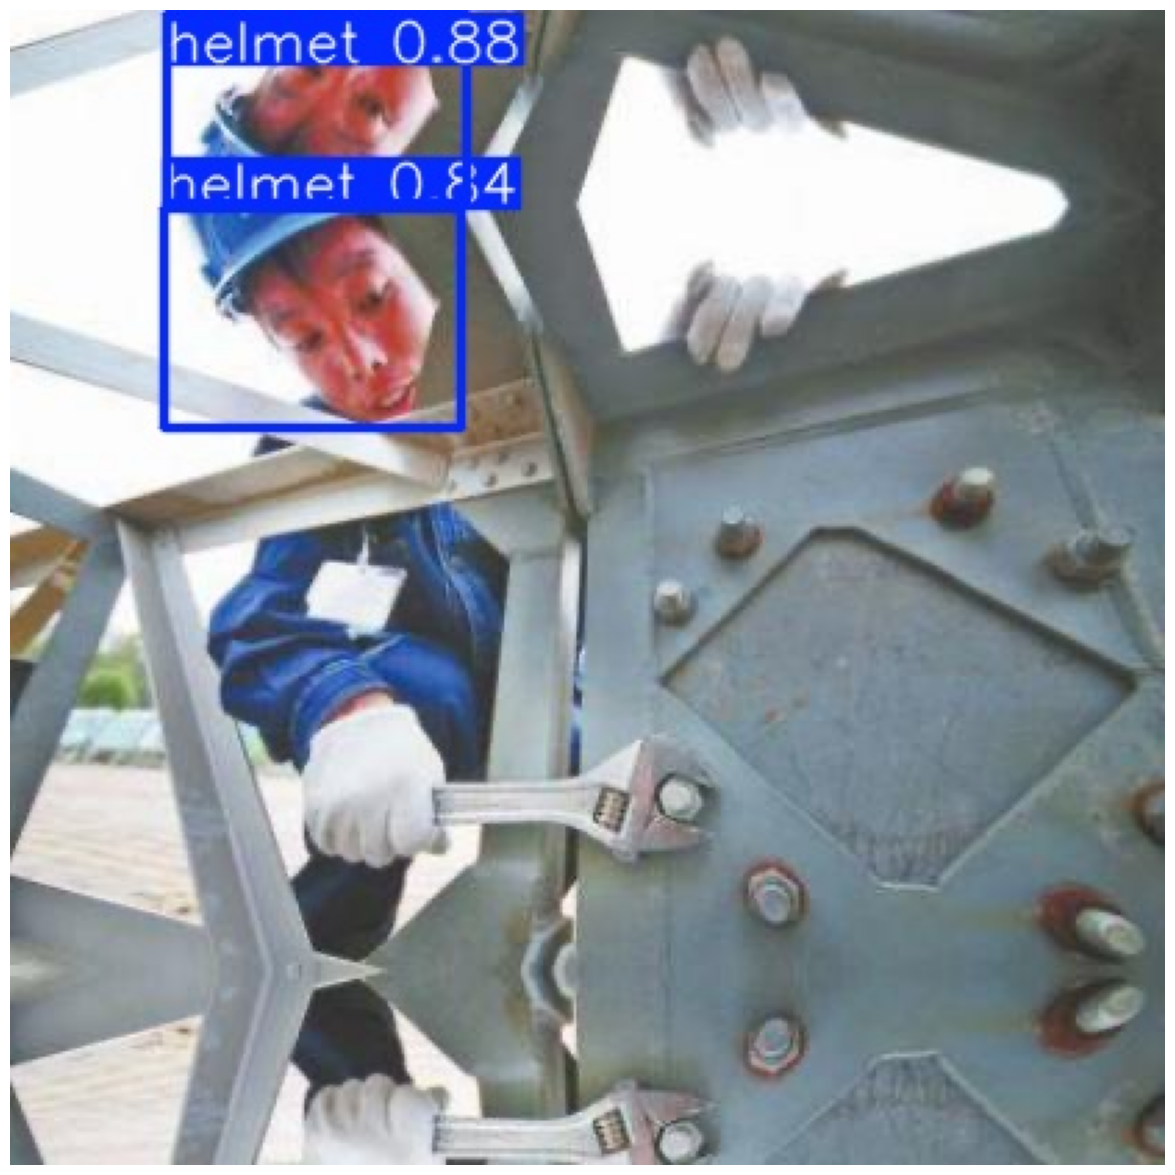

In [ ]:
# Отображение случайного результата
detected_images = os.listdir('/content/runs/detect/exp/')
n = random.randint(0, len(detected_images) - 1)
img = Image.open('/content/runs/detect/exp/' + detected_images[n])
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')  # Убираем оси для чистоты изображения
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')